# World Demographics

Author: Nicholas Czipo

Date: 8/5/2025

## Project Overview

This project seeks to analyze world demographic data and will utilize webscraping to retrieve the data from worldometers.info. 

Through data exploration, I will seek to answer the following questions:

*1.)	What is the average population density? The median? How spread out are these values?*

*2.)	What is the average life expectancy? The median? How “spread out” are these values?*

*3.)	How does life expectancy for males compare and contrast with life expectancy for females.*

*4.)	What is the average daily oil consumption? The median?  How “spread out” are these values?*

*5.)	What is the average daily water consumption? The median? How “spread out” are these values?*

*6.)	What is the average fertility rate? The median? How “spread out” are these values?*

*7.)    What is the average GDP per capita? The median? How "spread out" are these values?*

*7.)	 Is there a correlation between any of the above variables and a country's urbanization rate?*


## Part I: Gathering the Data

To begin, let's import all neceessary modules.

In [1]:
import requests
import time
from bs4 import BeautifulSoup as bs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

We will scrape our data from five webpages on the site worldometers.info. The following cell carries out all necessary retrieval and data extraction using the Python modules requests and BeautifulSoup. It saves the tabular data from each webpage in a seperate csv file. 

In [2]:
urls = ['https://www.worldometers.info/world-population/population-by-country/', 
        'https://www.worldometers.info/demographics/life-expectancy/',
        'https://www.worldometers.info/gdp/gdp-by-country/',
        'https://www.worldometers.info/oil/oil-consumption-by-country/',
        'https://www.worldometers.info/water/'
       ]
crawl_delay = 10      # 10 second crawl delay will be implemented
count = 1             # Count will be used when naming csv files

# SCRAPE THE DATA
# The below for loop will iterate through each url listed above. It will extract the HTML from each webpage,
# load it into a Beautiful Soup object named soup, parse for the desired data and lastly,
# convert said data into a pandas dataframe.
for url in urls:
    #GET HTML FROM WEBPAGE
    response = requests.get(url)
    status = response.status_code
    if status == 200:
        page = response.text
        soup = bs(page)
    else:
        print(f"Oops! Received status code {status}")

    countries_list = []   # Multidimensional array that holds table rows; will be converted to a dataframe 
                          # after parsing is complete     
    headers = []          # Holds header names

    # EXTRACT TABLE HEADERS 
    # (ChatGPT assisted with this portion of the parsing. The prompt I used was: how to extract column headers in Beautiful Soup
    data_table = soup.find(class_='datatable') #finds table using class name

    thead = data_table.find('thead')           #finds <thead> tag within data_table
 
    header_row = thead.find('tr')              #finds row of table headers using <tr> tag
    for th in header_row.find_all('th'):       #finds all header cell tags <th> and text therein
        headers.append(th.text.strip())        #appends headers list with each header name, stripping all whitespace

    countries_list.append(headers)             


    # EXTRACT TABLE DATA
    data_table = soup.find(class_='datatable').tbody      #finds table body

    #The following nested for loop iterates through each row in data_table. For each row, every cell is appended 
    #to the row_data list. When all cells are parsed, the complete row is appened to countries_list
    for row in data_table.find_all('tr'):                 
        row_data = []
        for cell in row.find_all('td'):
            row_data.append(cell.text)
        countries_list.append(row_data)

    # CONVERT COUNTRIES_LIST TO A PANDAS DATAFRAME
    countries_df = pd.DataFrame(countries_list)

    # SAVE AS CSV FILE
    countries_df.to_excel(f'Country Table {count}.xlsx', index = False)

    #CRAWL DELAY
    time.sleep(crawl_delay)

    #UPDATE COUNT
    count += 1
    

## Part II: Data Cleaning

Having extracted the data, we can now begin the process of wrangling it. The ultimate goal is to arrive at one clean dataframe. 

Let's begin by loading in each csv file and viewing the first few rows.

In [2]:
table1 = pd.read_excel('Country Table 1.xlsx')
table2 = pd.read_excel('Country Table 2.xlsx')
table3 = pd.read_excel('Country Table 3.xlsx')
table4 = pd.read_excel('Country Table 4.xlsx')
table5 = pd.read_excel('Country Table 5.xlsx')


In [3]:
table1.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,#,Country (or dependency),Population 2025,Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Median Age,Urban Pop %,World Share
1,1,India,"1,463,865,525",0.89%,"12,929,734",492,"2,973,190","−495,753",1.94,28.8,37.1%,17.78%
2,2,China,"1,416,096,094",−0.23%,"−3,225,184",151,"9,388,211","−268,126",1.02,40.1,67.5%,17.20%
3,3,United States,"347,275,807",0.54%,"1,849,236",38,"9,147,420","1,230,663",1.62,38.5,82.8%,4.22%
4,4,Indonesia,"285,721,236",0.79%,"2,233,305",158,"1,811,570","−39,509",2.1,30.4,59.6%,3.47%


In [4]:
table2.head()

,0,1,2,3,4
0,Rank,Country,Life Expectancy (both sexes),Females Life Expectancy,Males Life Expectancy
1,1,Hong Kong,85.77,88.39,83.1
2,2,Japan,85,88.03,81.99
3,3,South Korea,84.53,87.4,81.44
4,4,French Polynesia,84.31,86.74,82.03


In [5]:
table3.head()

,0,1,2,3,4,5,6,7
0,#,Country,"GDP (nominal, 2023)",GDP (abbrev.),GDP Growth,Population 2023,GDP per capita,Share of World GDP
1,1,United States,"$27,720,700,000,000",27.721 trillion,2.89%,"343,477,335","$80,706",26.11%
2,2,China,"$17,794,800,000,000",17.795 trillion,5.25%,"1,422,584,933","$12,509",16.76%
3,3,Germany,"$4,525,700,000,000",4.526 trillion,−0.27%,"84,548,231","$53,528",4.26%
4,4,Japan,"$4,204,490,000,000",4.204 trillion,1.68%,"124,370,947","$33,806",3.96%


In [6]:
table4.head()

,0,1,2,3,4
0,#,Country,Daily Oil Consumption (barrels),World Share,Yearly Gallons Per Capita
1,1,United States,"19,687,287",20.27%,916.8
2,2,China,"12,791,553",13.17%,139.7
3,3,India,"4,443,000",4.58%,50.7
4,4,Japan,"4,012,877",4.13%,483.8


In [7]:
table5.head()

,0,1,2,3
0,Country,"Yearly Water Used (m³, thousand of litres)",Daily Water Used Per Capita (litres),Population
1,Afghanistan,"20,280,000,000 Year: 2000","2,760","20,130,327 Year: 2000"
2,Albania,"1,311,000,000 Year: 2006","1,177","3,050,809 Year: 2006"
3,Algeria,"9,978,000,000 Year: 2016",669,"40,850,721 Year: 2016"
4,Angola,"705,800,000 Year: 2005",100,"19,291,161 Year: 2005"


Let's begin by converting the first row in each table to represent the column names.

In [8]:
tables = [table1, table2, table3, table4, table5]
for table in tables:
    table.columns = table.iloc[0]
    table.drop([0], inplace = True)
    table.reset_index(drop = True, inplace = True)
    
    

In [9]:
table1.head()

,#,Country (or dependency),Population 2025,Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Median Age,Urban Pop %,World Share
0,1,India,"1,463,865,525",0.89%,"12,929,734",492,"2,973,190","−495,753",1.94,28.8,37.1%,17.78%
1,2,China,"1,416,096,094",−0.23%,"−3,225,184",151,"9,388,211","−268,126",1.02,40.1,67.5%,17.20%
2,3,United States,"347,275,807",0.54%,"1,849,236",38,"9,147,420","1,230,663",1.62,38.5,82.8%,4.22%
3,4,Indonesia,"285,721,236",0.79%,"2,233,305",158,"1,811,570","−39,509",2.1,30.4,59.6%,3.47%
4,5,Pakistan,"255,219,554",1.57%,"3,950,390",331,"770,880","−1,235,336",3.5,20.6,34.4%,3.10%


In [10]:
table2.head()

,Rank,Country,Life Expectancy (both sexes),Females Life Expectancy,Males Life Expectancy
0,1,Hong Kong,85.77,88.39,83.1
1,2,Japan,85,88.03,81.99
2,3,South Korea,84.53,87.4,81.44
3,4,French Polynesia,84.31,86.74,82.03
4,5,Switzerland,84.23,86.06,82.34


In [11]:
table3.head()

,#,Country,"GDP (nominal, 2023)",GDP (abbrev.),GDP Growth,Population 2023,GDP per capita,Share of World GDP
0,1,United States,"$27,720,700,000,000",27.721 trillion,2.89%,"343,477,335","$80,706",26.11%
1,2,China,"$17,794,800,000,000",17.795 trillion,5.25%,"1,422,584,933","$12,509",16.76%
2,3,Germany,"$4,525,700,000,000",4.526 trillion,−0.27%,"84,548,231","$53,528",4.26%
3,4,Japan,"$4,204,490,000,000",4.204 trillion,1.68%,"124,370,947","$33,806",3.96%
4,5,India,"$3,567,550,000,000",3.568 trillion,8.15%,"1,438,069,596","$2,481",3.36%


In [12]:
table4.head()

,#,Country,Daily Oil Consumption (barrels),World Share,Yearly Gallons Per Capita
0,1,United States,"19,687,287",20.27%,916.8
1,2,China,"12,791,553",13.17%,139.7
2,3,India,"4,443,000",4.58%,50.7
3,4,Japan,"4,012,877",4.13%,483.8
4,5,Russia,"3,631,287",3.74%,381.9


In [13]:
 table5.head()

,Country,"Yearly Water Used (m³, thousand of litres)",Daily Water Used Per Capita (litres),Population
0,Afghanistan,"20,280,000,000 Year: 2000","2,760","20,130,327 Year: 2000"
1,Albania,"1,311,000,000 Year: 2006","1,177","3,050,809 Year: 2006"
2,Algeria,"9,978,000,000 Year: 2016",669,"40,850,721 Year: 2016"
3,Angola,"705,800,000 Year: 2005",100,"19,291,161 Year: 2005"
4,Antigua and Barbuda,"11,500,000 Year: 2012",361,"87,260 Year: 2012"


Let's quickly rename the country column for table 1. This will be helpful when we merge our datasets.

In [14]:
table1.rename(columns = {table1.columns[1]:'Country'}, inplace = True)

Before we merge these datasets, let's look at their shape.

In [15]:
for table in tables:
    print(table.shape)

(233, 12)
(201, 5)
(181, 8)
(214, 5)
(181, 4)


As we can see, our tables have different row sizes. Checking for duplciates:

In [16]:
for table in tables:
    print(table.drop_duplicates(keep = 'first', inplace = True))


None
None
None
None
None


There are no duplicates. 

We will perform a one-to-one inner join on the tables using the Country column as a key. There are currently 195 offical countries. As we can see from the table shapes, some exceed that number(e.g. table1 contains not only countries but also dependencies and territories) while other undershoot it. 

In [17]:
countries = table1.merge(table2, on = 'Country')

In [18]:
countries.shape

(201, 16)

I will use a loop to finish merging the data sets.

In [19]:
count = 2 #counts starts at two to account for the first merge
while count < len(tables):
    countries = countries.merge(tables[count], on = 'Country')
    #Stop merge if there is a many to many join(this often presents itself when you end with more rows than you start with
    assert len(countries.index) <= len(tables[count].index), "Error: Many to Many Join"     
    count += 1

Let's view the shape and columns of our new dataframe.

In [20]:
countries.shape

(166, 30)

In [21]:
countries.columns

Index(['#_x', 'Country', 'Population 2025', 'Yearly Change', 'Net Change',
       'Density (P/Km²)', 'Land Area (Km²)', 'Migrants (net)', 'Fert. Rate',
       'Median Age', 'Urban Pop %', 'World Share_x', 'Rank',
       'Life Expectancy (both sexes)', 'Females Life Expectancy',
       'Males Life Expectancy', '#_y', 'GDP (nominal, 2023)', 'GDP (abbrev.)',
       'GDP Growth', 'Population 2023', 'GDP per capita', 'Share of World GDP',
       '#', 'Daily Oil Consumption (barrels)', 'World Share_y',
       'Yearly Gallons Per Capita',
       'Yearly Water Used (m³, thousand of litres)',
       'Daily Water Used Per Capita (litres)', 'Population'],
      dtype='object', name=0)

There are several columns we will not be using in this project. Let's drop those and then rename a few columns for increased clarity. 

In [22]:
to_drop = ['#_x', 'Yearly Change', 'Net Change', 'Migrants (net)', 'Median Age', 'Rank', '#_y', 
           'Population 2023', 'GDP (abbrev.)', 'GDP Growth', 'Share of World GDP', '#', 'Population']
countries.drop(to_drop, axis = 1, inplace = True)

countries.columns

Index(['Country', 'Population 2025', 'Density (P/Km²)', 'Land Area (Km²)',
       'Fert. Rate', 'Urban Pop %', 'World Share_x',
       'Life Expectancy (both sexes)', 'Females Life Expectancy',
       'Males Life Expectancy', 'GDP (nominal, 2023)', 'GDP per capita',
       'Daily Oil Consumption (barrels)', 'World Share_y',
       'Yearly Gallons Per Capita',
       'Yearly Water Used (m³, thousand of litres)',
       'Daily Water Used Per Capita (litres)'],
      dtype='object', name=0)

In [23]:
#Dropping the Yearly Water Used (m^3, thousand of litres) column is easier by index given the suoerscript. There is 
#also a duplicate 'Daily Water Used Per Capita(litres)' column that is the last in the data set. which I will drop
#using indexing
countries.drop(countries.columns[15], axis = 1, inplace = True)
#countries.drop(countries.columns[-1], axis = 1, inplace = True)

In [24]:
to_rename = {'World Share_x': 'World Share Urban Pop', 
             'World Share_y': 'World Share Oil'}
countries.rename(columns = to_rename, inplace = True)

#Renaming the Density (P/Km^2) and Land Area(Km^2) is easier to do by column number on account of the superscript.
countries.rename(columns = 
                 {countries.columns[2]: 'Population Density', 
                  countries.columns[3]: 'Land Area(Sq. Km)'}, inplace = True)


countries.columns

Index(['Country', 'Population 2025', 'Population Density', 'Land Area(Sq. Km)',
       'Fert. Rate', 'Urban Pop %', 'World Share Urban Pop',
       'Life Expectancy (both sexes)', 'Females Life Expectancy',
       'Males Life Expectancy', 'GDP (nominal, 2023)', 'GDP per capita',
       'Daily Oil Consumption (barrels)', 'World Share Oil',
       'Yearly Gallons Per Capita', 'Daily Water Used Per Capita (litres)'],
      dtype='object', name=0)

Next, let's view the data types of our columns. They should all be numeric.

In [25]:
countries.dtypes

0
Country                                 object
Population 2025                         object
Population Density                      object
Land Area(Sq. Km)                       object
Fert. Rate                              object
Urban Pop %                             object
World Share Urban Pop                   object
Life Expectancy (both sexes)            object
Females Life Expectancy                 object
Males Life Expectancy                   object
GDP (nominal, 2023)                     object
GDP per capita                          object
Daily Oil Consumption (barrels)         object
World Share Oil                         object
Yearly Gallons Per Capita               object
Daily Water Used Per Capita (litres)    object
dtype: object

As we can see, all our columns are objects. Let's convert all the columns beside Country to numeric.

In order to do this, we should first clean up the values in each column so that we aren't given errors when converting to a numeric data type.

Let's get an idea of our data one more time so we know what must be done for each column.

In [26]:
countries.head()

,Country,Population 2025,Population Density,Land Area(Sq. Km),Fert. Rate,Urban Pop %,World Share Urban Pop,Life Expectancy (both sexes),Females Life Expectancy,Males Life Expectancy,"GDP (nominal, 2023)",GDP per capita,Daily Oil Consumption (barrels),World Share Oil,Yearly Gallons Per Capita,Daily Water Used Per Capita (litres)
0,India,"1,463,865,525",492,"2,973,190",1.94,37.1%,17.78%,72.48,74.13,70.95,"$3,567,550,000,000","$2,481","4,443,000",4.58%,50.7,"1,677"
1,China,"1,416,096,094",151,"9,388,211",1.02,67.5%,17.20%,78.37,81.25,75.65,"$17,794,800,000,000","$12,509","12,791,553",13.17%,139.7,"1,174"
2,United States,"347,275,807",38,"9,147,420",1.62,82.8%,4.22%,79.61,82.11,77.22,"$27,720,700,000,000","$80,706","19,687,287",20.27%,916.8,"3,732"
3,Indonesia,"285,721,236",158,"1,811,570",2.1,59.6%,3.47%,71.44,73.61,69.29,"$1,371,170,000,000","$4,876","1,623,000",1.67%,94,"2,305"
4,Pakistan,"255,219,554",331,"770,880",3.5,34.4%,3.10%,67.94,70.47,65.58,"$337,912,000,000","$1,365","556,000",0.57%,38.7,"2,653"


Here is what must be done for each applicable column:

*Population 2025: Drop commas*

*Land Area(Sq. Km): Drop commas*

*Urban Pop: Drop percent*

*World Share Urban Pop: Drop percent*

*GDP(nominal, 2023): Drop dollar sign and commas*

*GDP per capita: Drop dollar sign and commas*

*Daily Oil Consumption(barrels): Drop commas*

*World Share Oil: Drop percent*

*Daily Water Used Per Capita(litres): Drop commas*

The code listed below carries out these operations.

In [27]:
to_replace = [',','$', '%']
countries['Population 2025'] = countries['Population 2025'].astype(str).str.replace(',', '')
countries['Land Area(Sq. Km)'] = countries['Land Area(Sq. Km)'].astype(str).str.replace(',', '')
countries['Urban Pop %'] = countries['Urban Pop %'].astype(str).str.replace('%', '')
countries['World Share Urban Pop'] = countries['World Share Urban Pop'].astype(str).str.replace('%', '')
countries['GDP (nominal, 2023)'] = countries['GDP (nominal, 2023)'].astype(str).str.replace('$', '').str.replace(',', '')
countries['GDP per capita'] = countries['GDP per capita'].astype(str).str.replace('$', '').str.replace(',', '')
countries['Daily Oil Consumption (barrels)'] = countries['Daily Oil Consumption (barrels)'].astype(str).str.replace(',','')
countries['World Share Oil'] = countries['World Share Oil'].astype(str).str.replace('%', '')
countries['Daily Water Used Per Capita (litres)'] = countries['Daily Water Used Per Capita (litres)'].astype(str).str.replace(',','')

In [28]:
countries.head()

,Country,Population 2025,Population Density,Land Area(Sq. Km),Fert. Rate,Urban Pop %,World Share Urban Pop,Life Expectancy (both sexes),Females Life Expectancy,Males Life Expectancy,"GDP (nominal, 2023)",GDP per capita,Daily Oil Consumption (barrels),World Share Oil,Yearly Gallons Per Capita,Daily Water Used Per Capita (litres)
0,India,1463865525,492,2973190,1.94,37.1,17.78,72.48,74.13,70.95,3567550000000,2481,4443000,4.58,50.7,1677
1,China,1416096094,151,9388211,1.02,67.5,17.20,78.37,81.25,75.65,17794800000000,12509,12791553,13.17,139.7,1174
2,United States,347275807,38,9147420,1.62,82.8,4.22,79.61,82.11,77.22,27720700000000,80706,19687287,20.27,916.8,3732
3,Indonesia,285721236,158,1811570,2.1,59.6,3.47,71.44,73.61,69.29,1371170000000,4876,1623000,1.67,94,2305
4,Pakistan,255219554,331,770880,3.5,34.4,3.10,67.94,70.47,65.58,337912000000,1365,556000,0.57,38.7,2653


We can now convert each column to a numeric datatype.

In [29]:
columns_to_numeric = [
 'Population 2025',
 'Population Density',
 'Land Area(Sq. Km)',
 'Fert. Rate',
 'Urban Pop %',
 'World Share Urban Pop',
 'Life Expectancy (both sexes)',
 'Females Life Expectancy',
 'Males Life Expectancy',
 'GDP (nominal, 2023)',
 'GDP per capita',
 'Daily Oil Consumption (barrels)',
 'World Share Oil',
 'Yearly Gallons Per Capita',
 'Daily Water Used Per Capita (litres)'
]


countries[columns_to_numeric] = countries[columns_to_numeric].apply(pd.to_numeric, errors = 'coerce', axis = 1)
countries.dtypes

0
Country                                  object
Population 2025                         float64
Population Density                      float64
Land Area(Sq. Km)                       float64
Fert. Rate                              float64
Urban Pop %                             float64
World Share Urban Pop                   float64
Life Expectancy (both sexes)            float64
Females Life Expectancy                 float64
Males Life Expectancy                   float64
GDP (nominal, 2023)                     float64
GDP per capita                          float64
Daily Oil Consumption (barrels)         float64
World Share Oil                         float64
Yearly Gallons Per Capita               float64
Daily Water Used Per Capita (litres)    float64
dtype: object

I will also convert the Urban Population Percentage Column to decimal values.

In [30]:
countries['Urban Pop %'] = countries['Urban Pop %'].apply(lambda x: x*.01)
countries.rename(columns = {'Urban Pop %': 'Urban Pop'}, inplace = True)
countries.head()


,Country,Population 2025,Population Density,Land Area(Sq. Km),Fert. Rate,Urban Pop,World Share Urban Pop,Life Expectancy (both sexes),Females Life Expectancy,Males Life Expectancy,"GDP (nominal, 2023)",GDP per capita,Daily Oil Consumption (barrels),World Share Oil,Yearly Gallons Per Capita,Daily Water Used Per Capita (litres)
0,India,1.463866e+09,492.0,2973190.0,1.94,0.371,17.78,72.48,74.13,70.95,3.567550e+12,2481.0,4443000.0,4.58,50.7,1677.0
1,China,1.416096e+09,151.0,9388211.0,1.02,0.675,17.20,78.37,81.25,75.65,1.779480e+13,12509.0,12791553.0,13.17,139.7,1174.0
2,United States,3.472758e+08,38.0,9147420.0,1.62,0.828,4.22,79.61,82.11,77.22,2.772070e+13,80706.0,19687287.0,20.27,916.8,3732.0
3,Indonesia,2.857212e+08,158.0,1811570.0,2.10,0.596,3.47,71.44,73.61,69.29,1.371170e+12,4876.0,1623000.0,1.67,94.0,2305.0
4,Pakistan,2.552196e+08,331.0,770880.0,3.50,0.344,3.10,67.94,70.47,65.58,3.379120e+11,1365.0,556000.0,0.57,38.7,2653.0


Before finishing our cleaning, we should check for any null values.

In [31]:
countries.isnull().sum()

0
Country                                 0
Population 2025                         0
Population Density                      5
Land Area(Sq. Km)                       0
Fert. Rate                              0
Urban Pop                               3
World Share Urban Pop                   0
Life Expectancy (both sexes)            0
Females Life Expectancy                 0
Males Life Expectancy                   0
GDP (nominal, 2023)                     0
GDP per capita                          0
Daily Oil Consumption (barrels)         0
World Share Oil                         0
Yearly Gallons Per Capita               0
Daily Water Used Per Capita (litres)    0
dtype: int64

As we can see, there are no null values.

In [32]:
#countries.dropna(inplace = True)
#countries.isnull().sum()

Having cleaned our data, let's save the dataframe as a new excel file.

In [33]:
countries.to_excel(f'Countries Cleaned.xlsx', index = False)

## Part III: Data Exploration

### Population Density

Let's begin our data exploration by considering population density.

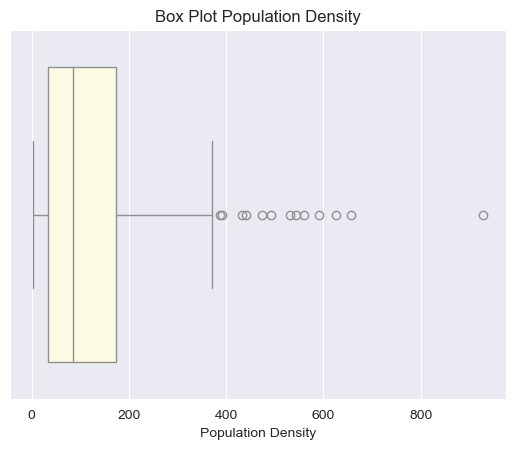

In [34]:
box, ax = plt.subplots()
sns.boxplot(data = countries, x = 'Population Density', ax = ax, color = 'lightyellow')
ax.set_title('Box Plot Population Density')
plt.show()



In [35]:
countries['Population Density'].describe()

count    161.000000
mean     138.422360
std      153.750514
min        2.000000
25%       34.000000
50%       86.000000
75%      174.000000
max      929.000000
Name: Population Density, dtype: float64

In [36]:
countries['Population Density'].median()

86.0

As we can see from the boxplot above, the distribution is skewed to the right with a long right whisker and several outliers on the higher end of the distribution. 

The median population density, as measured by population per square kilometer, is 89. Note that this value is lower than the mean, which is 139.17, given that the median is robust against outliers. 

Seventy-five percent of countries have a population density of 175 people per square kilometer or less and the small size of the box is an indicataion of the small variability in population density for the middle fifty percent of values. 

A historgram can help us to confirm the above observations.

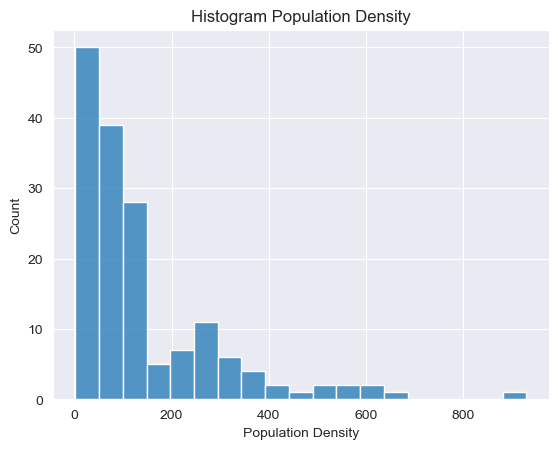

In [37]:
hist, ax = plt.subplots()
sns.histplot(data = countries, x = 'Population Density', ax=ax)
ax.set_title('Histogram Population Density')
plt.show()

### Urbanization

Next, let's look at urbanization, which is a measure what portion of a country's population live in ubran areas. Instead of using a box and whisker plot in conjuction with a histogram, I will use a violin plot, which gives us the best of both plots.

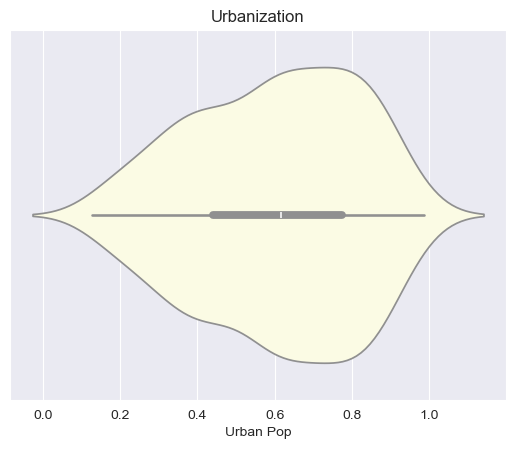

In [38]:
violin, ax = plt.subplots()
sns.violinplot(data = countries, x = 'Urban Pop', ax = ax, color = 'lightyellow')
ax.set_title('Urbanization')
plt.show()

In [39]:
countries['Urban Pop'].describe()

count    163.000000
mean       0.602890
std        0.211693
min        0.126000
25%        0.440000
50%        0.617000
75%        0.774500
max        0.988000
Name: Urban Pop, dtype: float64

In [40]:
countries['Urban Pop'].median()

0.617

From the plot above, it is clear that the distribution of urbanization rates is slightly skewed to the left, although not as drastic as population density. This is shown by the wider parts of the "violin" occuring more so towards the right hand side of the graph. 

The mean and median are nearly identical at a little over .60. Thus, we can infer that, on average, a little over half of any particular country's population resides in an urban area.  
 

It is not reasonable to suspect that country's with higher population densities also have higher urbanization rates. Let's see if this bears out in the data using a scatterplot.

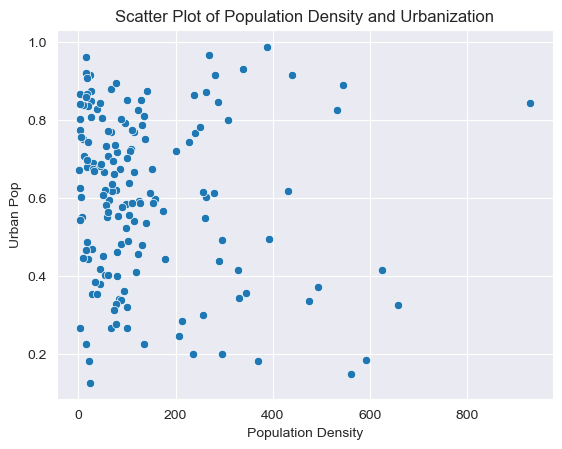

In [41]:
scatter, ax = plt.subplots()
sns.scatterplot(data = countries, x = 'Population Density', y = 'Urban Pop', ax = ax)
ax.set_title('Scatter Plot of Population Density and Urbanization')
plt.show()

In [42]:
countries['Population Density'].corr(countries['Urban Pop'])

np.float64(-0.10855197842612516)

As we can see, there is no strong correlation between population density and urbanization. The correlation is in fact negative and weak at only -0.10. 

Most countries have density values lower than 175, as discussed above, and these countries span the entire range of urbanization rates. There appears to be a dense cluster of points in the upper left hand portion of the graph, indicating a large number of countries with low population densities and high urbanization rates.

Perhpas this is due to countries with larger land areas. Afterall, population density is a function of both population and land area. Thus, these may be countries with plentiful land but with most of its people living in cities.

Using color to identify land area, we can see that this idea bears some fruit.

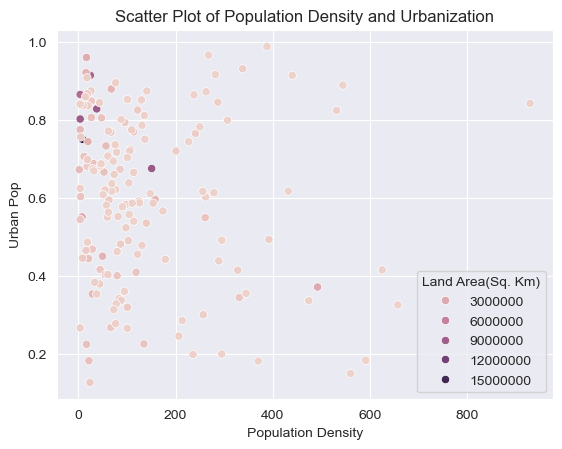

In [43]:
scatter, ax = plt.subplots()
sns.scatterplot(data = countries, x = 'Population Density', y = 'Urban Pop', hue = 'Land Area(Sq. Km)', ax = ax)
ax.set_title('Scatter Plot of Population Density and Urbanization')
plt.show()

### Life Expectancy

Let's turn to life expectancy.

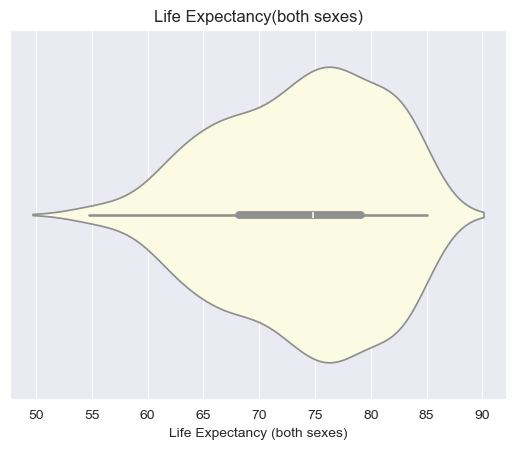

In [44]:
violin, ax = plt.subplots()
sns.violinplot(data = countries, x = 'Life Expectancy (both sexes)', ax = ax, color = 'lightyellow')
ax.set_title('Life Expectancy(both sexes)')
plt.show()

In [45]:
countries['Life Expectancy (both sexes)'].describe()

count    166.000000
mean      73.766325
std        7.083207
min       54.780000
25%       68.157500
50%       74.805000
75%       79.137500
max       85.000000
Name: Life Expectancy (both sexes), dtype: float64

In [46]:
countries['Life Expectancy (both sexes)'].median()

74.805

The mean life expectancy for both males and females is approximately 74 years, which is about the same as the median. Seventy-five percent of people can expect to live no longer than 75 years.

The distribution is skewed to the left, with most people living longer, healthier lives. 

Perhaps more interesting is how male and female life expectancy compare and contrast. Let's use box plots to compare the two.

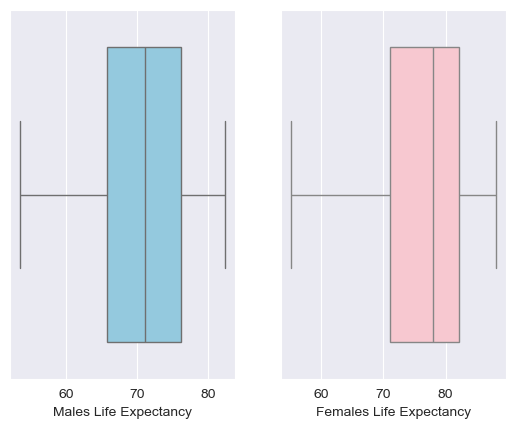

In [47]:
box, ax = plt.subplots(1,2)
sns.boxplot(data = countries, x = 'Males Life Expectancy', ax = ax[0], color = 'skyblue')
sns.boxplot(data = countries, x = 'Females Life Expectancy', ax = ax[1], color = 'pink')
plt.show()


In [48]:
countries['Males Life Expectancy'].describe()

count    166.000000
mean      71.193554
std        7.085892
min       53.540000
25%       65.755000
50%       71.185000
75%       76.180000
max       82.430000
Name: Males Life Expectancy, dtype: float64

In [49]:
countries['Females Life Expectancy'].describe()

count    166.000000
mean      76.355602
std        7.191685
min       55.120000
25%       71.042500
50%       77.930000
75%       82.070000
max       88.030000
Name: Females Life Expectancy, dtype: float64

As we can see, females have a higher life expectancy than males. Whereas the average for males is 71 years, females can expect to live for 76 years, on average. 

Interestingly, the shape of the distribution appears to be roughly the same for both sexes. 

Let's take a brief look at how life expectancy correlates with urbanization.

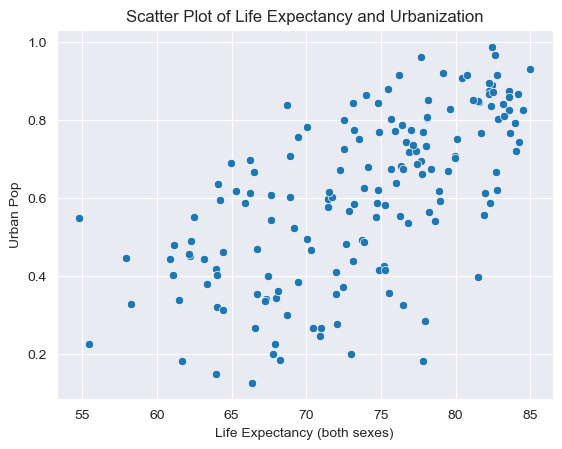

In [50]:
scatter, ax = plt.subplots()
sns.scatterplot(data = countries, x = 'Life Expectancy (both sexes)', y = 'Urban Pop', ax = ax)
ax.set_title('Scatter Plot of Life Expectancy and Urbanization')
plt.show()

In [51]:
countries['Life Expectancy (both sexes)'].corr(countries['Urban Pop'])

np.float64(0.6356045502419708)

As we can see, there is a strong correlation between life expectancy and urbanization rates, with a correlation coefficient of 0.64. Let's take a look by gender.

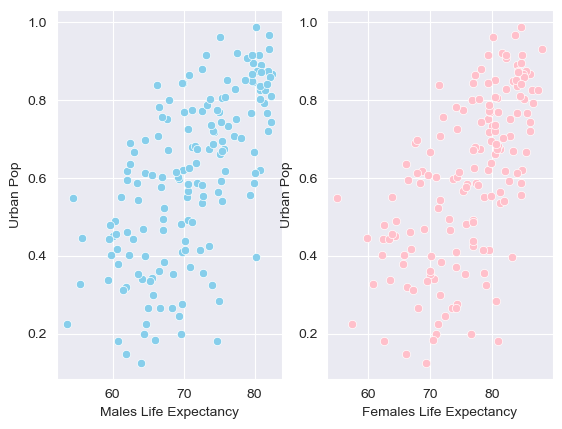

In [52]:
scatter, ax = plt.subplots(1,2)
sns.scatterplot(data = countries, x = 'Males Life Expectancy', y = 'Urban Pop', ax = ax[0], color = 'skyblue')
sns.scatterplot(data = countries, x= 'Females Life Expectancy', y = 'Urban Pop', ax = ax[1], color = 'pink')
plt.show()

In [53]:
countries['Females Life Expectancy'].corr(countries['Urban Pop'])

np.float64(0.6230360664837272)

In [54]:
countries['Males Life Expectancy'].corr(countries['Urban Pop'])

np.float64(0.6392943289821662)

From the above, it is clear that the correlation between sex is practically the same.

**Therefore, life expectancy may prove useful in predicting urbanization rates.**


### GDP per Capita

Let's take a look at GDP per capita, using 2023 nominal(non inflation adjusted) US dollars.

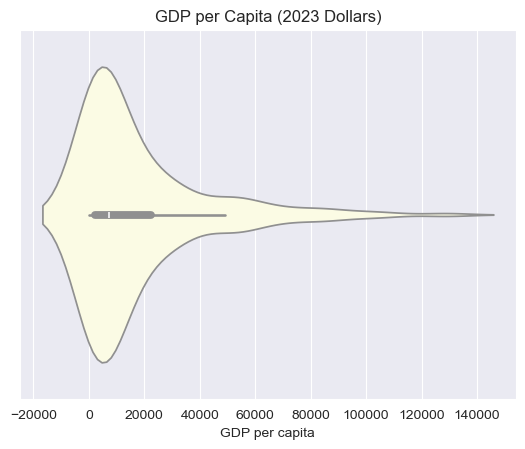

In [83]:
violin, ax = plt.subplots()
sns.violinplot(data = countries, x = 'GDP per capita', ax = ax, color = 'lightyellow')
ax.set_title('GDP per Capita (2023 Dollars)')
plt.show()

In [82]:
countries['GDP per capita'].describe()

count       166.000000
mean      17448.807229
std       23563.333310
min         193.000000
25%        2338.500000
50%        7097.000000
75%       22314.500000
max      128936.000000
Name: GDP per capita, dtype: float64

In [57]:
countries['GDP per capita'].median()

7097.0

The distribution is heavily skewed to the right. Whearas the median is only $7,097, the mean is $17,448, a clear indication of outliers. 

Now let's see how GDP correlates with urbanization. 

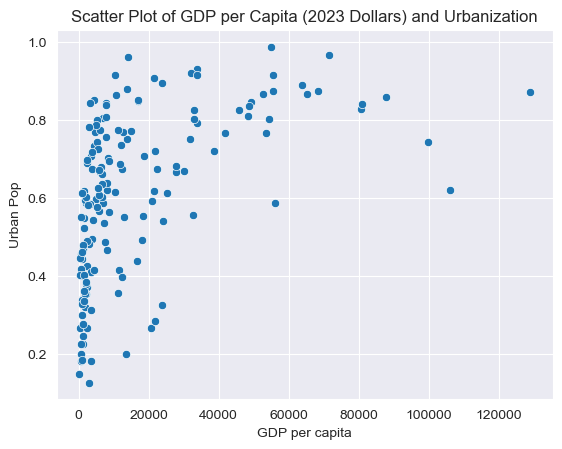

In [84]:
scatter, ax = plt.subplots()
sns.scatterplot(data = countries, x = 'GDP per capita', y = 'Urban Pop', ax = ax)
ax.set_title('Scatter Plot of GDP per Capita (2023 Dollars) and Urbanization')
plt.show()

In [59]:
countries['GDP per capita'].corr(countries['Urban Pop'])

np.float64(0.5127469612677503)

There is moderate correlation between the two variables. Given the cluster of values on the lower end of the GDP per capita axis, we can use a hexbin for clarification as to where most values lie. The darker the hexagon, the more values that occur within that area.

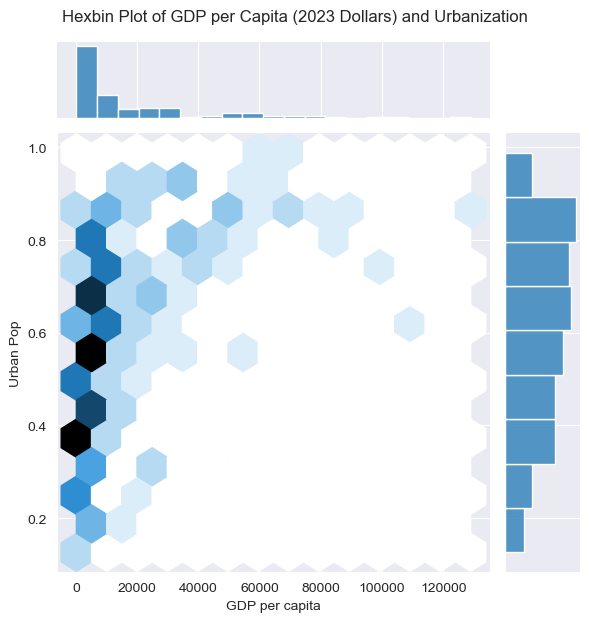

In [85]:
hexbin = sns.jointplot(data = countries, x = 'GDP per capita', y = 'Urban Pop', kind = 'hex')
hexbin.figure.suptitle('Hexbin Plot of GDP per Capita (2023 Dollars) and Urbanization', y = 1.03)
plt.show()

Hexbins also give the individual histograms for the underlying variables. As we can see, the above histograms further confirm the observations we made earlier through our violin plots.

**Thus, given a correlation coefficient of 0.5, GDP per Capita may also prove useful in predicting a country's urbanization rate.**

Before moving on, let's see how life expectancy relates to GDP per Capita and Urbanization.

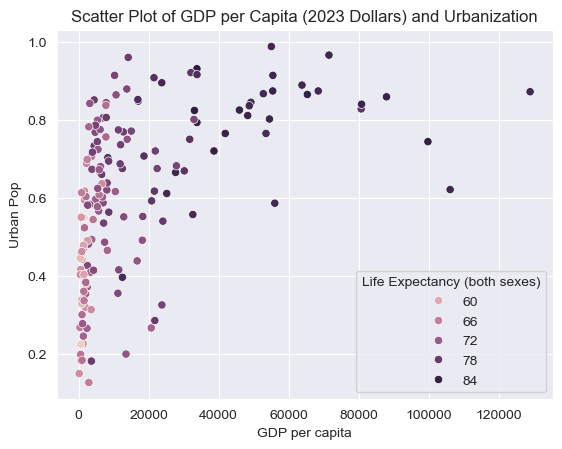

In [86]:
scatter, ax = plt.subplots()
sns.scatterplot(data = countries, x = 'GDP per capita', y = 'Urban Pop', hue = 'Life Expectancy (both sexes)', ax = ax)
ax.set_title('Scatter Plot of GDP per Capita (2023 Dollars) and Urbanization')
plt.show()

In general, it appears countries with higher GDP per Capita also have higher life expectancy, which isn't too surprising.

### Fertility Rates

Before looking to see how fertility rates correlate with urbanization, let's take a brief look at a violin plot to get an idea of the variable's distribution.

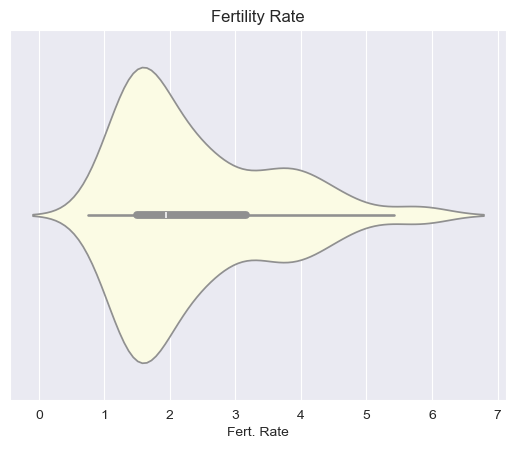

In [62]:
violin, ax = plt.subplots()
sns.violinplot(data = countries, x = 'Fert. Rate', ax = ax, color = 'lightyellow')
ax.set_title('Fertility Rate')
plt.show()

In [63]:
countries['Fert. Rate'].describe()

count    166.000000
mean       2.387831
std        1.174465
min        0.750000
25%        1.500000
50%        1.940000
75%        3.157500
max        5.940000
Name: Fert. Rate, dtype: float64

In [64]:
countries['Fert. Rate'].median()

1.94

The mean is 2.38 children, slightly larger than the median of 1.94 (note the max value of 5.94). 

Looking at how fertility rates correspond to urbanization, we have:

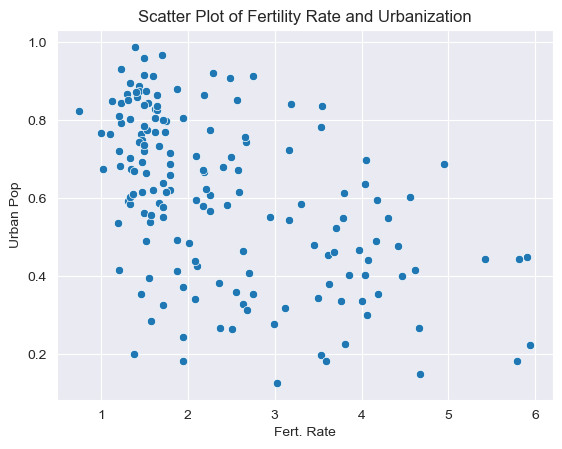

In [65]:
scatter, ax = plt.subplots()
sns.scatterplot(data = countries, x = 'Fert. Rate', y = 'Urban Pop', ax = ax)
ax.set_title('Scatter Plot of Fertility Rate and Urbanization')
plt.show()

In [66]:
countries['Fert. Rate'].corr(countries['Urban Pop'])

np.float64(-0.5082115462657898)

**There is a moderate inverse correlation between the two variables. As fertility rates climb, the percentage of the population which lives in urban areas tends to drop. Therefore, fertility rates may prove useful when constructing a model to predict urbanization**

Let's see how life expectancy interacts with these variabbles.

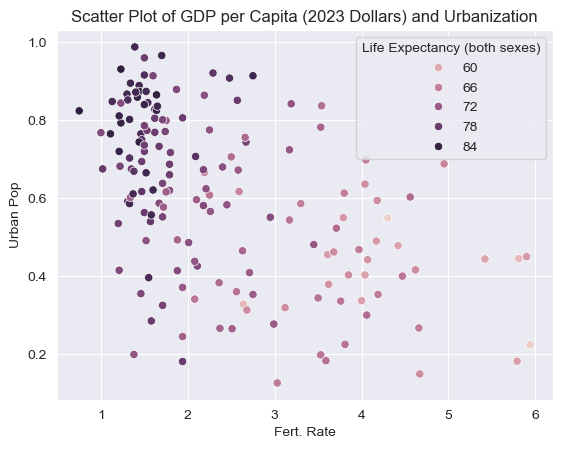

In [87]:
scatter, ax = plt.subplots()
sns.scatterplot(data = countries, x = 'Fert. Rate', y = 'Urban Pop', hue = 'Life Expectancy (both sexes)', ax = ax)
ax.set_title('Scatter Plot of GDP per Capita (2023 Dollars) and Urbanization')
plt.show()

The graph is quite clear: Countries with lower fertility rates and a higher degree of urbanization can also expect to have a greater life expectancy. 

### Water and Oil Usage

Lets's take a brief look at the violinplots of water use per capita, measured in liters, and daily oil consumption, measured in barrels.

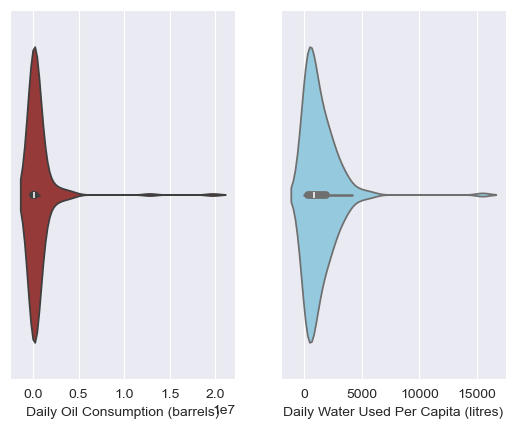

In [74]:
box, ax = plt.subplots(1,2)
sns.violinplot(data = countries, x = 'Daily Oil Consumption (barrels)', ax = ax[0], color = 'brown')
sns.violinplot(data = countries, x = 'Daily Water Used Per Capita (litres)', ax = ax[1], color = 'skyblue')
plt.show()

Both distributions are greatly skewed to the right, with daily oil consumption being more drastic, as indicated by the large violin in the left hand potion of the graph and small interior bar.

Do countries with greater urbanization rates use more water and oil? Let's see by plotting a few scatterplots.

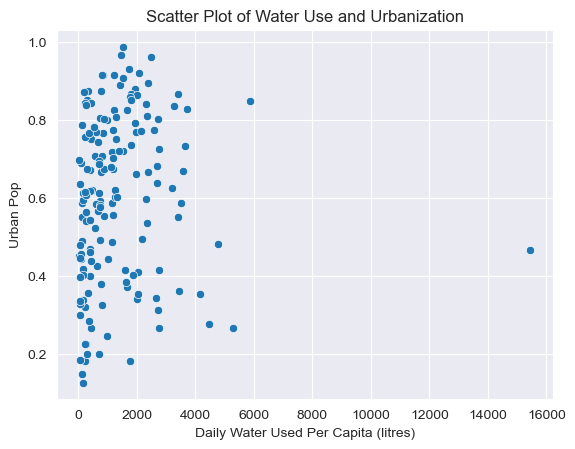

In [89]:
scatter, ax = plt.subplots()
sns.scatterplot(data = countries, x = 'Daily Water Used Per Capita (litres)', y = 'Urban Pop', ax = ax)
ax.set_title('Scatter Plot of Water Use and Urbanization')
plt.show()

In [90]:
countries['Daily Water Used Per Capita (litres)'].corr(countries['Urban Pop'])

np.float64(0.05982914125433172)

There is hardly any discernable correlation between water use, by the liter, and urbanization.

Let's check daily oil consumption, measured in barrels, against urbanization.

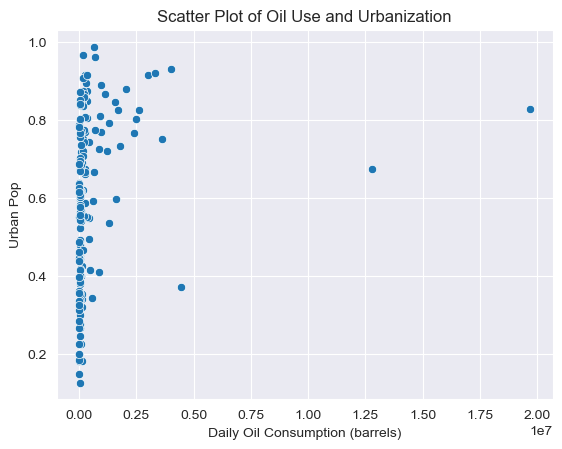

In [93]:
scatter, ax = plt.subplots()
sns.scatterplot(data = countries, x = 'Daily Oil Consumption (barrels)', y = 'Urban Pop', ax = ax)
ax.set_title('Scatter Plot of Oil Use and Urbanization')
plt.show()

In [92]:
countries['Daily Oil Consumption (barrels)'].corr(countries['Urban Pop'])

np.float64(0.20281149847236038)

Although greater than water use, there is still only a weak correlation between oil use and urbanization rates.

Thefore, the above two variables may not prove the most useful when predicting how much of a country's population lives in urban areas. 

### Exploratory Data Analysis Conclusions

The above analysis examined population density, life expectancy, fertility rates, GDP per Capita, and water and oil consumption and explored how these variables related to a country's urbanization rate. We found that a country's fertility rate, life expectancy and GDP per Capita all had a moderate to weak correlation with its urbanization rate. 

Having concluded our exploratory data analysis, we can now begin constructing and training a model that predicts urbanization.

## Part III: Multivariable Regression Analysis

To be completed outside of class due to time. 

## Part IV: Citations

**Data Sources**

All data was obtained from worldometers.info. The links are listed below.

'https://www.worldometers.info/world-population/population-by-country/', 

'https://www.worldometers.info/demographics/life-expectancy/',

'https://www.worldometers.info/gdp/gdp-by-country/',

'https://www.worldometers.info/oil/oil-consumption-by-country/',

'https://www.worldometers.info/water/'

**Other Sources**

Deitel, Paul J., and Harvey M. Deitel. Intro to Python for Computer Science and Data Science: Learning to Program with AI, Big Data and the Cloud. Pearson, 2020.

Lee, Wei-Meng. Python Machine Learning. Wiley, 2019.

Daniel Y. Chen. Pandas For Everyone: Python Data Analysis. Pearson, 2023.

“Streamlining Data Preparation: How to Set Column Names in a Pandas Dataframe from the First Row.” Saturn Cloud Blog, 20 Oct. 2023, saturncloud.io/blog/convert-the-first-row-of-a-pandas-dataframe-to-column-names-a-comprehensive-guide/. Accessed 03 Aug. 2025. 